In [9]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

In [10]:
df = pd.read_csv('diabetes.csv') # reading in the dataset with pandas
np.random.seed(42) # setting the random seed

In [11]:
#look at the data on a surface level: 
#This includes the structure of the dataset as a table, 
#details about the features and 
#useful statistics via the describe function
display('Shape: ----------------------',df.shape) #how the dataset is built up: how many lines and columns are
display('head: ----------------------',df.head()) #the first 5 lines of the DS (Data Set)
display('tail: ----------------------',df.tail()) #the last 5 lines of the DS
display('info: ----------------------') 
display(df.info()) #the datatypes of each columns, and is there any null value there
display('describe: ----------------------',df.describe()) #describing statistics about the DS
display('Columns: ----------------------',df.columns) #the exact name of the columns, useful for later (ex.: use/copy into code)

'Shape: ----------------------'

(768, 9)

'head: ----------------------'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


'tail: ----------------------'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


'info: ----------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

'describe: ----------------------'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


'Columns: ----------------------'

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
#let's see how the outcome is balanced with the value_counts method:
display('balance:',df.Outcome.value_counts(), '----------------')

#let's look how many zeros are we dealing with per columns:
zero_count_dict = {} #for this we build a dictionary with the column names and counting the 0-s in them
for col in df.columns:
    zero_count_dict[col] = df[col].value_counts().sort_index().iloc[0]
display('zero counts:',zero_count_dict)

'balance:'

Outcome
0    500
1    268
Name: count, dtype: int64

'----------------'

'zero counts:'

{'Pregnancies': 111,
 'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11,
 'DiabetesPedigreeFunction': 1,
 'Age': 63,
 'Outcome': 500}

In [13]:
# creating a balanced set with random sampling for the better distribution visualization.
# This way the ratios are representative

# We separate the two class of the dataset:
df_d0 = df[df['Outcome'] == 0] #this is the part who did not develop the disease
df_d1 = df[df['Outcome'] == 1] #this is the part who did develop the disease

#and random sample the same amount of instances from the higher represented '0' class to match the available '1' class instances
df_d0_samp = df_d0.sample(268,replace = False)
df_bal = pd.concat([df_d1, df_d0_samp]) #putting back the two class together

display('balance:',df_bal.Outcome.value_counts()) #check whether we done it correctly 

'balance:'

Outcome
1    268
0    268
Name: count, dtype: int64

1 : Glucose
2 : BMI
3 : DiabetesPedigreeFunction


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x1500 with 0 Axes>

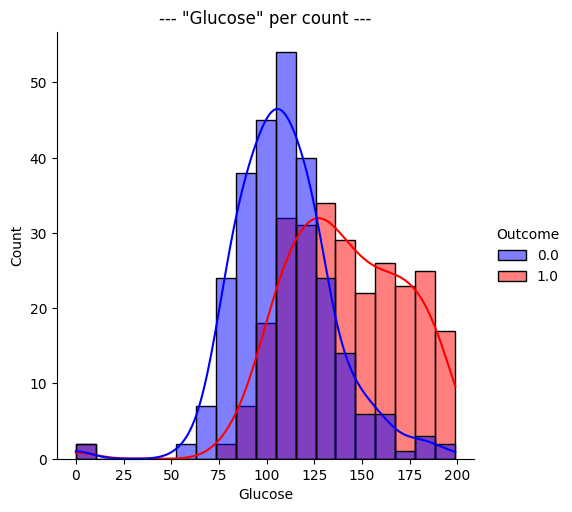

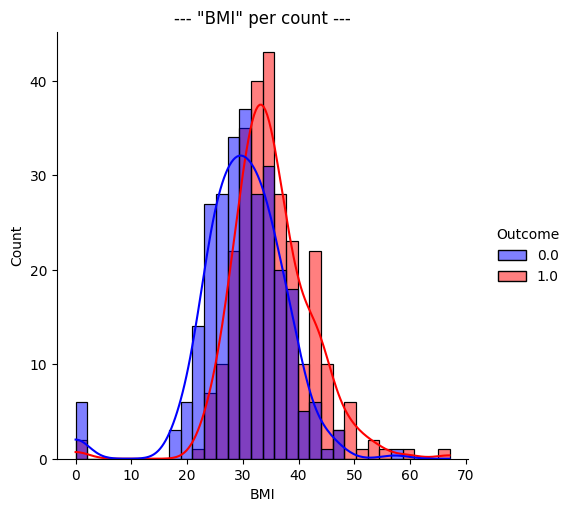

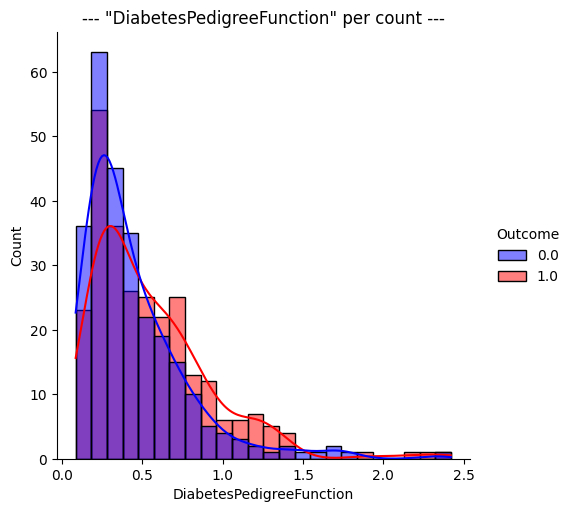

In [14]:
# it is vital that we stick to the same coloring of the classes troughout the analysis
palette = {0: 'blue', 1: 'red'} # so we define our core color coding for the classes, 
        # blue for 'not having' and red for 'having' the condition
        # I use this variable as a global one ('palette') and reference in my visualizations


# See the distribution via a displot with kde. 'kde' is a perfect method to see the inflexion point between the classes 
# - this is the point where one of the classes exceeds the other in counts along the increasing examined feature
features_listed = ['Glucose', 'BMI', 'DiabetesPedigreeFunction'] #according to our initial assumption
plt.figure(figsize = [20, 15]) #setting the figure size for matplotlib
counter = 0 #we set a counter to track how many features we have already drawn
for i in features_listed:
    counter += 1
    print(counter, ':', i)
    sns.displot(data = df_bal, kde=True, x = df[str(i)], hue='Outcome', palette=palette)
    plt.title(f'--- "{i}" per count ---')
plt.plot()
plt.show

In [23]:
# custom function for data vizualization - this creates nice charts in a compact from
def look_at_distr_hist(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        print('look at the distribution for all numeric variables')
        for i in df_num.columns:
            counter += 1
            print(counter, ':', i)
            plt.subplot(3, 3, counter)
            sns.histplot(data = df, x = df[str(i)], hue = df[class_feature], multiple  = 'dodge', palette=palette, kde=True)
            plt.title(f'--- "{i}" per count ---')
        plt.plot()

    #look at the distribution for all categ variables
    if df_cat is not None:
        print('look at the distribution for all categorical variables')
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_cat.columns:
            counter += 1
            print(counter, ':', i)
            plt.subplot(3, 3, counter)
            sns.histplot(data = df, x = df[str(i)], hue = df[class_feature], multiple  = 'dodge', palette=palette)
            plt.title(f'"{i}"')
    plt.plot();
    

look at the distribution for all numeric variables
1 : Pregnancies
2 : Glucose
3 : BloodPressure
4 : SkinThickness
5 : Insulin
6 : BMI
7 : DiabetesPedigreeFunction
8 : Age
9 : Outcome


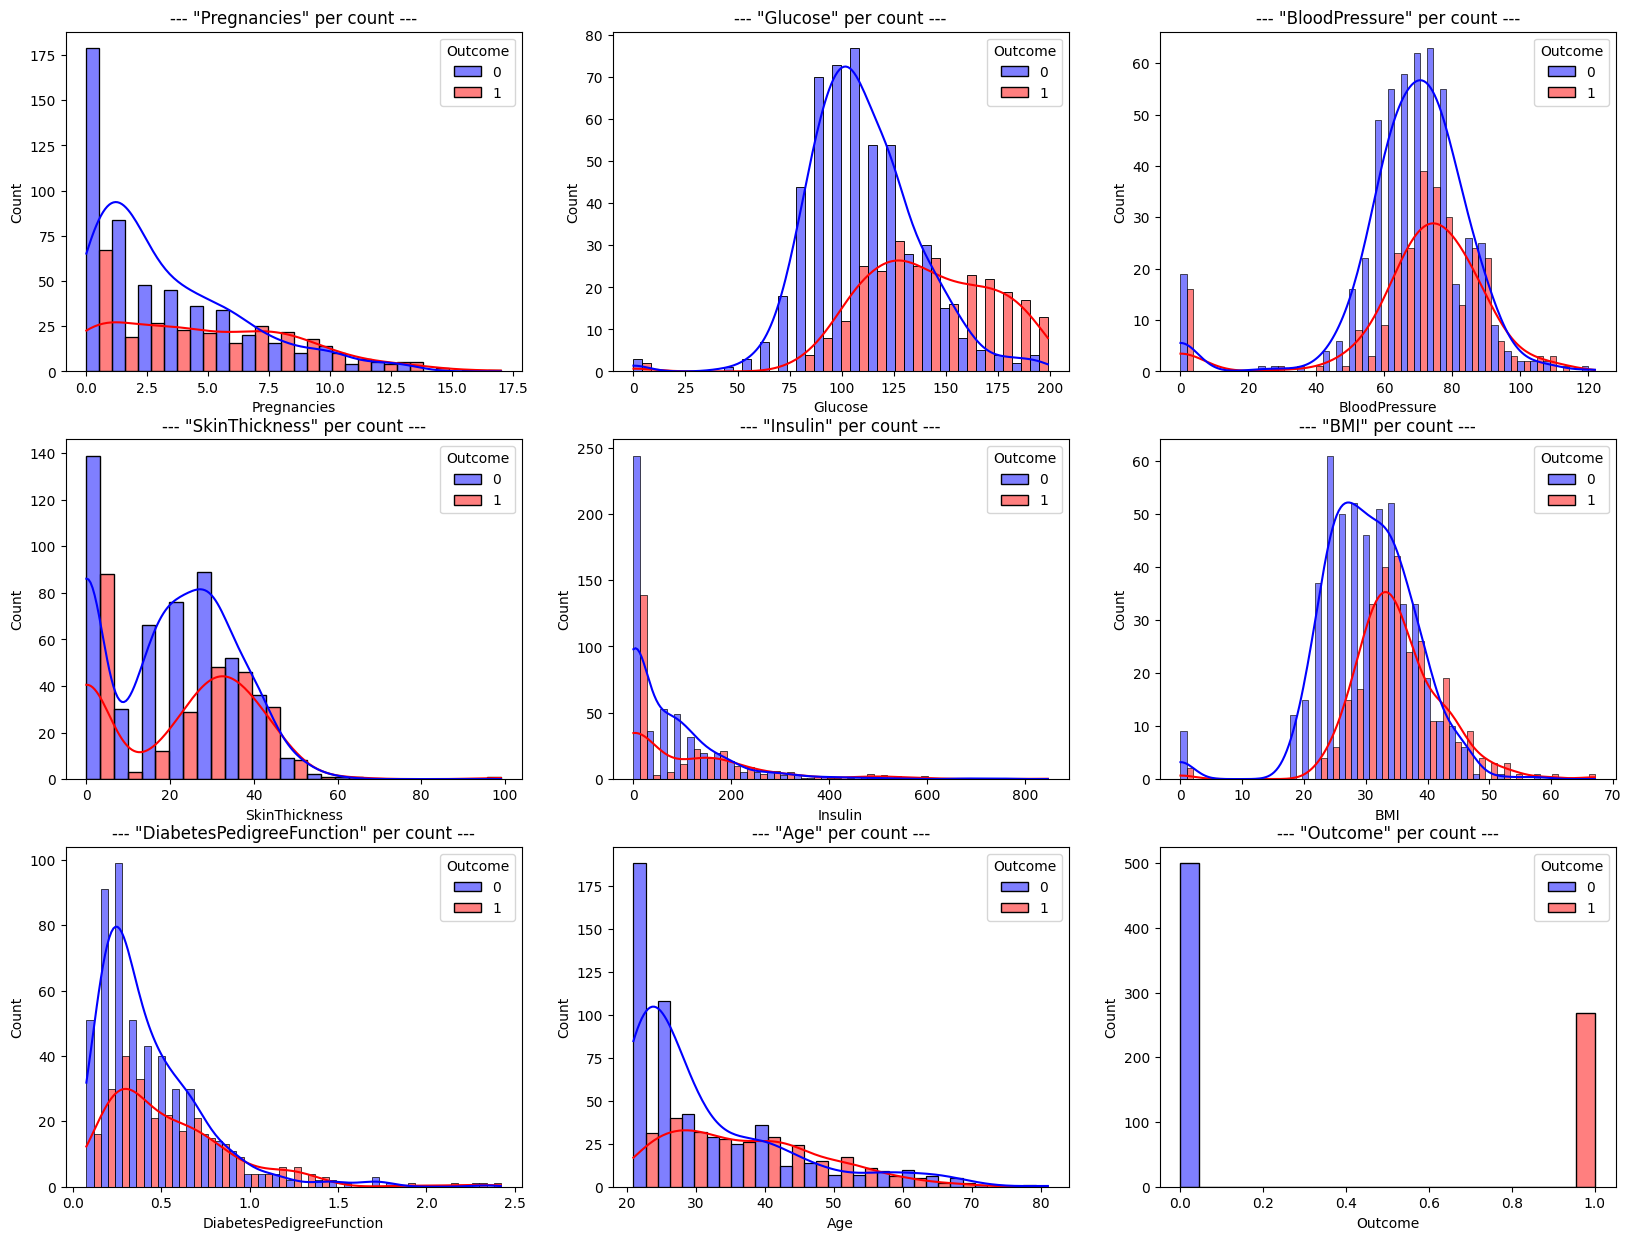

In [24]:
#See the distribution of all the features via histograms
look_at_distr_hist(df_num=df_bal, class_feature="Outcome")

look at the distribution for all numeric variables
1 : Pregnancies


C:\Users\urina\AppData\Local\Temp\ipykernel_30188\2407925675.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y = df[str(i)], x = df[class_feature], dodge=True, palette=palette)


ValueError: The palette dictionary is missing keys: {'0', '1'}

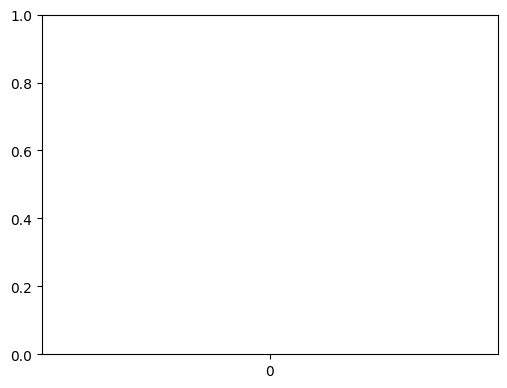

In [17]:
# custom function for data vizualization for boxplot
def look_at_distr_box(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        print('look at the distribution for all numeric variables')
        for i in df_num.columns:
            counter += 1
            print(counter, ':', i)
            plt.subplot(3, 3, counter)
            sns.boxplot(data = df, y = df[str(i)], x = df[class_feature], dodge=True, palette=palette)
            plt.title(f'--- "{i}" per {class_feature} ---')
        plt.plot()

    #look at the distribution for all categ variables
    if df_cat is not None:
        print('look at the distribution for all categorical variables')
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_cat.columns:
            counter += 1
            print(counter, ':', i)
            plt.subplot(3, 3, counter)
            sns.boxplot(data = df, x = df[str(i)], y = df[class_feature], palette=palette)
            plt.title(f'--- "{i}" per {class_feature} ---')
    plt.plot();

look_at_distr_box(df_num=df_bal, class_feature="Outcome")

In [ ]:
# draw a correlation matrix to see what features are corralating to the outcome the most. We presume more correlation as the feature scores closer to 1.
display(df.corr().sort_values('Outcome', ascending=False))
correlation = df.corr().sort_values('Outcome', ascending=False)[['Outcome']]
sns.heatmap(correlation, annot=True) #heatmap is a good was for showing the differences in values as it automatically color codes the cells

In [ ]:
# as we have discussed in the beggining there are 0 values in these columns, 
# which makes no sense because glucose level and BMI cant be 0 for a living person. So these can be considered as missing values.
# Now we remove these instances to clean the DS.
# As this action probably will have an effect on the balance (since we are removing datapoints) 
# we start with the intial set and sample again if necessary

print(df.shape)
df = df[df['Glucose'] != 0]

print(df.shape)
df = df[df['BMI'] != 0]
print(df.shape)

# balance
display('balance:',df.Outcome.value_counts()) #look at the current balance: as we can see we lost 4 points of data in the '1' class

In [ ]:
# Again, creating a balanced set with random sampling for the better distribution visualization.
# This way the ratios are representative

# We separate the two class:
df_d0 = df[df['Outcome'] == 0]
df_d1 = df[df['Outcome'] == 1]

#and random sample the same amount of instances from the higher represented '0' class to match the available '1' class instances
df_d0_samp = df_d0.sample(264,replace = False) # this time 264 is the sample number for reason as we see above
df_bal = pd.concat([df_d1, df_d0_samp]) #putting back the two class together

display('balance:',df_bal.Outcome.value_counts()) #check whether we done it correctly and the two class is in balance now

In [ ]:
# Let's look closer at these Glucose vs BMI and their relative distribution to the Outcome in a regression plot
plt.figure(figsize=(20, 10))
sns.regplot(x='BMI', y='Glucose', data=df_bal[df_bal['Outcome'] == 0], color='blue') # we plot the two classes separately
sns.regplot(x='BMI', y='Glucose', data=df_bal[df_bal['Outcome'] == 1], color='red') # on top of eachother
plt.title('--- Glucose vs BMI scatterplot ---')
plt.show